## Covid EDA

## Downloading the Dataset

For the data analysis, I am using covid vaccination dataset from Ourworldindata.

Let's begin by downloading the data, and listing the files within the dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet
!pip install jovian --upgrade -q
import jovian

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

In [3]:
project_name = "CovidEDA" 

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "navhan9876/covideda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/navhan9876/covideda


'https://jovian.ai/navhan9876/covideda'

## Library Used in this Data Analysis

First we have to import all library which we will use in our analysis.

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from datetime import date
import calendar
import datetime
import time
pd.set_option('display.max_columns', None)

## Data Preparation and Cleaning

Here I will prepare my dataset for analysis by cleaning ( Handle missing, incorrect and invalid data ), explore the number of rows & columns, ranges of values of the dataset.

In [6]:
Rawdf = pd.read_csv(url,index_col=0,parse_dates=[0])
type(Rawdf)

pandas.core.frame.DataFrame

Now, let see how many rows and columns it have including their data type also.

In [7]:
Rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159321 entries, AFG to ZWE
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   149755 non-null  object 
 1   location                                    159321 non-null  object 
 2   date                                        159321 non-null  object 
 3   total_cases                                 156450 non-null  float64
 4   new_cases                                   156400 non-null  float64
 5   new_cases_smoothed                          155249 non-null  float64
 6   total_deaths                                138892 non-null  float64
 7   new_deaths                                  139060 non-null  float64
 8   new_deaths_smoothed                         138930 non-null  float64
 9   total_cases_per_million                     155722 non-null  float64
 10  ne

From the above result we can conclude that the dataset consists of atmost 160000 rows ( which updates time to time ) and 65 columns , most of which have float data type which is usual but the column with data is object which need to be changed.

In [8]:
(Rawdf.isnull().sum()/Rawdf.shape[0])*100 > 75

continent                                  False
location                                   False
date                                       False
total_cases                                False
new_cases                                  False
                                           ...  
human_development_index                    False
excess_mortality_cumulative_absolute        True
excess_mortality_cumulative                 True
excess_mortality                            True
excess_mortality_cumulative_per_million     True
Length: 66, dtype: bool

Now, Removing Columns which have contains null values more than 75 % except some columns

In [9]:
Rawdf.head(4)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [10]:
Rawdf.drop(Rawdf.columns[62:66],axis = 1, inplace = True)
Rawdf.drop(Rawdf.columns[47:59],axis = 1, inplace = True)
Rawdf.drop(Rawdf.columns[36:43],axis = 1, inplace = True)
Rawdf.drop(Rawdf.columns[15:29], axis = 1, inplace = True)
Rawdf.drop(Rawdf.columns[[5,8,11,14]], axis = 1, inplace = True)

In [11]:
Rawdf['date'] = pd.to_datetime(Rawdf['date'])
Rawdf.shape

(159321, 25)

Now, let see does our dataset contains using HeatMap

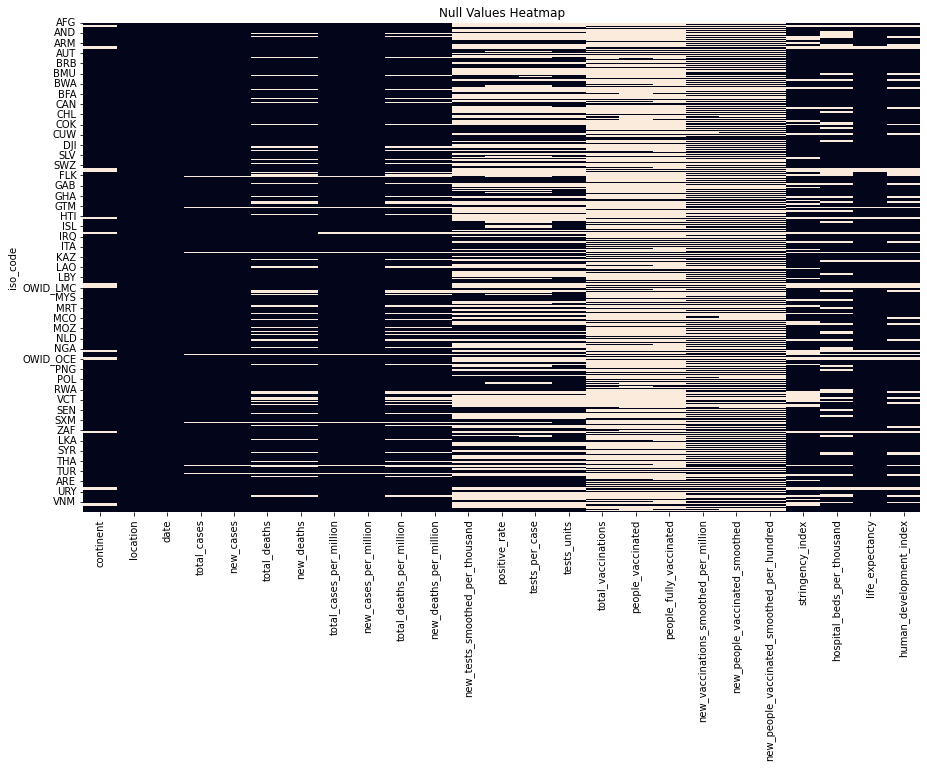

In [12]:
plt.figure(figsize=(15,9))
sns.heatmap(Rawdf.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

Now, from the result we can conclude that our dataset have many null values that will effect our data analysis in the later part. So according to the parameter that are given we need to either fill the null value or remove it from our dataset.

We also know that our data contains standard missing values ( NAN ) which we need to handle properly.

Now, to do this we can use (mean/median/mode) , bfill,ffill or interpolate. But as we know that our data is more inclined towards Time series. Hence, our missing values can not be filled with ((mean/median/mode) but can fill missing values with interpolate (best suited ) for some columns and filling values with zero for most of the columns.

In [13]:
Rawdf.iloc[:,21].interpolate(method='linear', limit_direction='backward', inplace=True)
Rawdf.iloc[:,23].interpolate(method='linear', limit_direction='backward', inplace=True)
Rawdf.iloc[:,24].interpolate(method='linear', limit_direction='backward', inplace=True)

In [14]:
Rawdf.fillna(0,inplace=True)

Now let see how our dataset changes by filling the null values with zero value.

In [15]:
Rawdf.isnull().sum()

continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
total_deaths                                  0
new_deaths                                    0
total_cases_per_million                       0
new_cases_per_million                         0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_tests_smoothed_per_thousand               0
positive_rate                                 0
tests_per_case                                0
tests_units                                   0
total_vaccinations                            0
people_vaccinated                             0
people_fully_vaccinated                       0
new_vaccinations_smoothed_per_million         0
new_people_vaccinated_smoothed                0
new_people_vaccinated_smoothed_per_hundr

In [17]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "navhan9876/newcovid" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/navhan9876/newcovid


'https://jovian.ai/navhan9876/newcovid'

## Exploratory Analysis and Visualization Along with Asking and Answering Questions

### Printing how many locations are present in the  dataframe and also showing locations from the dataframe.

In [16]:
numloc = Rawdf.groupby('location').sum().shape[0]
print('There are {} different locations in the dataset.'.format(numloc))

There are 238 different locations in the dataset.


In [17]:
locpresent = Rawdf.location.unique().tolist()
k = 1
for i in locpresent:
    print('{}. {}'.format(k,i))
    k = k+1

1. Afghanistan
2. Africa
3. Albania
4. Algeria
5. Andorra
6. Angola
7. Anguilla
8. Antigua and Barbuda
9. Argentina
10. Armenia
11. Aruba
12. Asia
13. Australia
14. Austria
15. Azerbaijan
16. Bahamas
17. Bahrain
18. Bangladesh
19. Barbados
20. Belarus
21. Belgium
22. Belize
23. Benin
24. Bermuda
25. Bhutan
26. Bolivia
27. Bonaire Sint Eustatius and Saba
28. Bosnia and Herzegovina
29. Botswana
30. Brazil
31. British Virgin Islands
32. Brunei
33. Bulgaria
34. Burkina Faso
35. Burundi
36. Cambodia
37. Cameroon
38. Canada
39. Cape Verde
40. Cayman Islands
41. Central African Republic
42. Chad
43. Chile
44. China
45. Colombia
46. Comoros
47. Congo
48. Cook Islands
49. Costa Rica
50. Cote d'Ivoire
51. Croatia
52. Cuba
53. Curacao
54. Cyprus
55. Czechia
56. Democratic Republic of Congo
57. Denmark
58. Djibouti
59. Dominica
60. Dominican Republic
61. Ecuador
62. Egypt
63. El Salvador
64. Equatorial Guinea
65. Eritrea
66. Estonia
67. Eswatini
68. Ethiopia
69. Europe
70. European Union
71. Faero

### Now, let see the Quick overview of our dataframe.

In [18]:
Rawdf.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.593210e+05,1.593210e+05,1.593210e+05,159321.000000,159321.000000,159321.000000,159321.000000,159321.000000,159321.000000,159321.000000,159321.000000,1.593210e+05,1.593210e+05,1.593210e+05,159321.000000,1.593210e+05,159321.000000,159321.000000,159321.000000,159321.000000,159321.000000
mean,2.261806e+06,1.027926e+04,4.802649e+04,148.766453,25249.806786,140.158012,417.698455,1.439814,1.391477,0.043591,106.275881,4.089277e+07,2.029465e+07,1.429029e+07,1661.789852,1.188074e+05,0.076041,49.878581,2.253999,73.697771,0.727304
std,1.363867e+07,7.660680e+04,2.705279e+05,777.741522,42760.397444,589.601389,718.273527,4.783265,5.193038,0.084203,2969.781840,3.687392e+08,1.892574e+08,1.449808e+08,3278.673868,1.571273e+06,0.195768,21.835445,2.493323,7.353343,0.145417
min,0.000000e+00,-7.434700e+04,0.000000e+00,-1918.000000,0.000000,-13876.282000,0.000000,-75.911000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,53.280000,0.394000
25%,1.395000e+03,0.000000e+00,2.000000e+01,0.000000,450.597000,0.000000,5.447000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,33.484757,0.000000,69.590000,0.611000
50%,2.080800e+04,6.800000e+01,3.370000e+02,1.000000,4015.258000,9.557000,64.729000,0.023000,0.002000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,49.954825,1.600000,75.050000,0.742000
75%,2.647250e+05,9.550000e+02,4.868000e+03,13.000000,32646.250000,90.341000,525.717000,0.979000,0.898000,0.049000,16.600000,3.488900e+04,1.496000e+03,0.000000e+00,2181.000000,3.646000e+03,0.074000,66.812321,3.320000,78.930000,0.844462
max,3.878788e+08,4.218655e+06,5.711322e+06,18057.000000,471468.832000,51427.491000,6187.339000,453.772000,147.603000,0.970400,422065.600000,1.014412e+10,4.821337e+09,4.177537e+09,117497.000000,1.005931e+08,11.750000,100.000000,13.800000,86.750000,0.957000


In [19]:
Rawdf.index.unique()

Index(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM',
       ...
       'UZB', 'VUT', 'VAT', 'VEN', 'VNM', 'WLF', 'OWID_WRL', 'YEM', 'ZMB',
       'ZWE'],
      dtype='object', name='iso_code', length=238)

In [20]:
Rawdf.head(4)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.126,0.126,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.126,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,0.5,64.83,0.511


### Showing the mean Human development mean for all location.

In [21]:
Rawdf.groupby('location')['human_development_index'].mean()*100

location
Afghanistan          51.10
Africa               65.30
Albania              79.50
Algeria              74.80
Andorra              86.80
                     ...  
Wallis and Futuna    72.05
World                73.70
Yemen                47.00
Zambia               58.40
Zimbabwe             57.10
Name: human_development_index, Length: 238, dtype: float64

### Showing the max positivity rate present in the dataframe by descending  order.

In [22]:
Rawdf.groupby('location')['positive_rate'].max().sort_values(ascending = False)*100

location
Uganda              97.04
Papua New Guinea    93.29
Botswana            89.19
Ecuador             86.54
Palestine           85.82
                    ...  
Iceland              0.00
Honduras             0.00
High income          0.00
Haiti                0.00
Liberia              0.00
Name: positive_rate, Length: 238, dtype: float64

In [23]:
dfnew2  = Rawdf.copy()
dfnew2.reset_index(inplace = True)
dfnew2.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand,life_expectancy,human_development_index
25259,KHM,Asia,Cambodia,2021-12-21,120427.0,4.0,3005.0,0.0,7106.328,0.236,177.323,0.000,0.000,0.0000,0.0,0,29972083.0,14233809.0,13606080.0,2874.0,3087.0,0.018,46.30000,0.80,69.82,0.594000
58259,GRL,North America,Greenland,2021-01-10,29.0,0.0,0.0,0.0,509.953,0.000,0.000,0.000,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,37.04000,0.00,71.70,0.840520
72057,ISR,Asia,Israel,2020-12-14,359506.0,2330.0,3004.0,5.0,38694.005,250.780,323.324,0.538,7.103,0.0275,36.3,tests performed,0.0,0.0,0.0,0.0,0.0,0.000,65.74000,2.99,82.97,0.919000
71148,IMN,Europe,Isle of Man,2020-06-03,336.0,0.0,24.0,0.0,3933.966,0.000,280.998,0.000,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,22.71101,0.00,81.40,0.951017
44854,ERI,Africa,Eritrea,2021-04-24,3605.0,0.0,10.0,0.0,1000.982,0.000,2.777,0.000,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,64.81000,0.70,66.32,0.459000


### Now, plotting graph for location having highest no of People fully Vaccinated 

                     iso_code  people_fully_vaccinated
location                                              
World                OWID_WRL             6.115612e+11
Asia                 OWID_ASI             3.735531e+11
Upper middle income  OWID_UMC             2.853462e+11
High income          OWID_HIC             1.826396e+11
Lower middle income  OWID_LMC             1.406567e+11
Europe               OWID_EUR             9.451635e+10
North America        OWID_NAM             7.844617e+10
India                     IND             7.313476e+10
European Union       OWID_EUN             6.617288e+10
United States             USA             5.458092e+10
South America        OWID_SAM             4.468385e+10
China                     CHN             2.536830e+10
Brazil                    BRA             2.188470e+10
Africa               OWID_AFR             1.678146e+10
Germany                   DEU             1.275000e+10


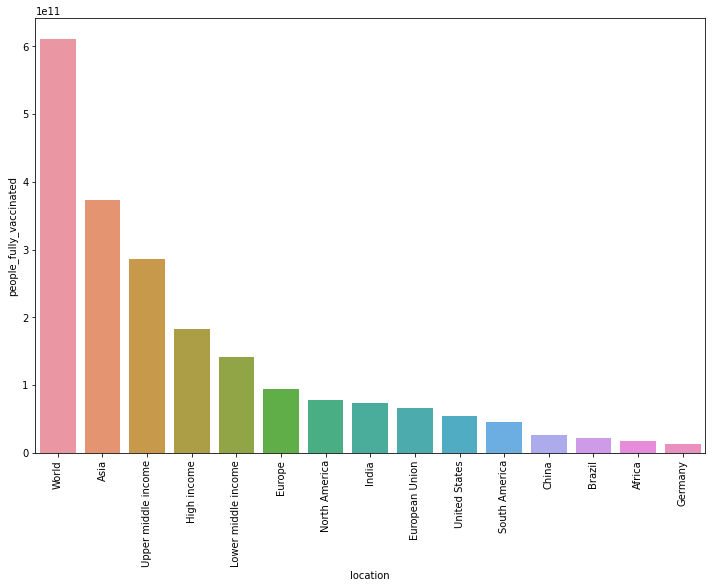

In [28]:
grphsh = dfnew2.groupby(['location','iso_code'])[['people_fully_vaccinated']].sum().sort_values('people_fully_vaccinated', ascending = False).head(15)
grphsh.reset_index(inplace = True)
grphsh.set_index( 'location',inplace = True)
print(grphsh)

plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
sns.barplot(data = grphsh, x = grphsh.index, y = grphsh.people_fully_vaccinated);

From the above graph we know that world,Asia,Upper middle Income etc are not location they are combination of such locations.
Hence we need to remove them.

For this we need their index and then remove them one by one.

In [25]:
tdf =  pd.DataFrame({'dropr' : ['OWID_WRL','OWID_UMC','OWID_HIC','OWID_INT','OWID_LIC','OWID_OCE','OWID_LMC','OWID_EUR','OWID_NAM','OWID_EUN','OWID_SAM','OWID_AFR','OWID_ASI']})
df = []
for i in tdf.dropr:
    df1 = dfnew2.index[(dfnew2['iso_code'] == i )].tolist()
    df.extend(df1)
    
    
print("Hence their are {} rows which we need to remove from our dataframe.".format(len(df)))

Hence their are 9566 rows which we need to remove from our dataframe.


In [26]:
for i in range(len(df)):
    k = df[i]
    dfnew2 = dfnew2.drop(k)

By doing this we have removed all the rows from our dataframe which we don't needed any more.

#### Now, we will try to find out top locations which are having highest no of people fully vaccinated and also plot our graph for it.

In [28]:
dfnew2.to_csv('cg.csv', index = False)
dfnew2['date'] = pd.to_datetime(dfnew2['date'])
dfnew2['weekday'] = pd.DatetimeIndex(dfnew2.date).weekday
dfnew2['month'] = pd.DatetimeIndex(dfnew2.date).month
dfnew2['day'] = pd.DatetimeIndex(dfnew2.date).day
dfnew2['year'] = pd.DatetimeIndex(dfnew2.date).year
dfnew2.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand,life_expectancy,human_development_index,weekday,month,day,year
154258,VAT,Europe,Vatican,2021-01-28,27.0,0.0,0.0,0.0,33251.232,0.000,0.000,0.000,0.000,0.0000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,34.892869,0.00,75.12,0.656872,3,1,28,2021
146531,TUR,Asia,Turkey,2021-08-12,6018485.0,22261.0,52703.0,138.0,70770.124,261.763,619.724,1.623,3.021,0.0955,10.5,tests performed,81436011.0,43304840.0,31782995.0,11630.0,279711.0,0.329,32.410000,2.81,77.69,0.820000,3,8,12,2021
115332,PHL,Asia,Philippines,2021-04-02,771497.0,15298.0,13320.0,17.0,6947.487,137.762,119.949,0.153,0.440,0.2006,5.0,people tested,0.0,0.0,0.0,229.0,23079.0,0.021,81.020000,1.00,71.23,0.718000,4,4,2,2021
132020,SOM,Africa,Somalia,2021-10-06,20900.0,323.0,1152.0,15.0,1277.545,19.744,70.418,0.917,0.000,0.0000,0.0,0,542501.0,297741.0,244760.0,414.0,5529.0,0.034,35.190000,0.90,57.40,0.684135,2,10,6,2021
104243,NZL,Oceania,New Zealand,2021-08-06,2880.0,0.0,26.0,0.0,561.809,0.000,5.072,0.000,1.125,0.0002,4034.3,tests performed,2155725.0,1345979.0,809718.0,7501.0,27964.0,0.546,22.220000,2.61,82.29,0.931000,4,8,6,2021


               iso_code  people_fully_vaccinated
location                                        
India               IND             7.313476e+10
United States       USA             5.458092e+10
China               CHN             2.536830e+10
Brazil              BRA             2.188470e+10
Germany             DEU             1.275000e+10
United Kingdom      GBR             1.138522e+10
Japan               JPN             1.033720e+10
Turkey              TUR             1.015578e+10
France              FRA             1.015011e+10
Italy               ITA             9.519241e+09
Russia              RUS             9.325894e+09
Mexico              MEX             9.067020e+09
South Korea         KOR             6.275813e+09
Canada              CAN             5.898474e+09
Spain               ESP             5.606206e+09


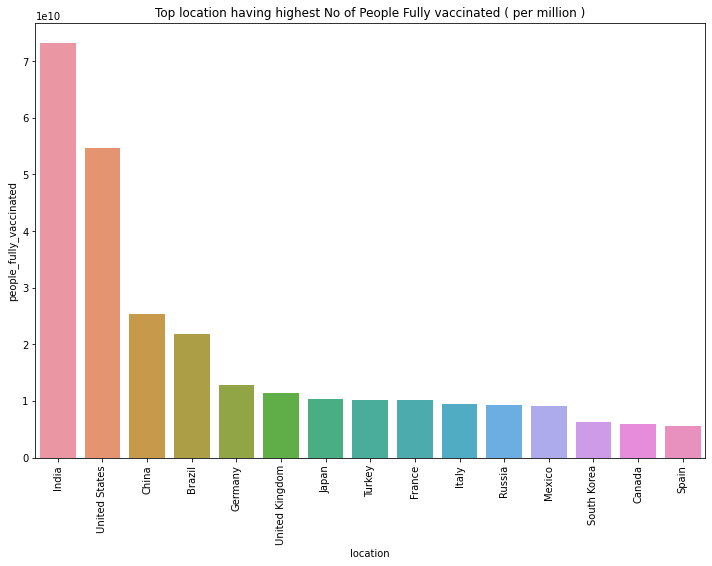

In [31]:
grphsh = dfnew2.groupby(['location','iso_code'])[['people_fully_vaccinated']].sum().sort_values('people_fully_vaccinated', ascending = False).head(15)
grphsh.reset_index(inplace = True)
grphsh.set_index( 'location',inplace = True)
print(grphsh)

plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
plt.title("Top location having highest No of People Fully vaccinated ( per million )")
sns.barplot(data = grphsh, x = grphsh.index, y = grphsh.people_fully_vaccinated);

### Q1 Showing people fully vaccinated w.r.t to continent in percentage.

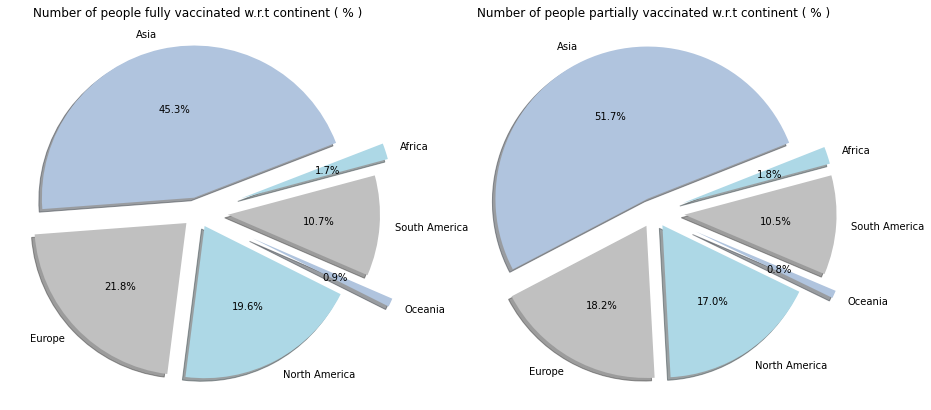

In [33]:
showdfcontinents = dfnew2.copy()
dfr = showdfcontinents.groupby('continent')[['people_fully_vaccinated']].sum()
dfs = showdfcontinents.groupby('continent')[['people_vaccinated']].sum()

fig, axes = plt.subplots( ncols=2, figsize=(15, 12))

my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.3, 0.1, 0.1,0.1,0.4,0.2)
axes[0].pie(dfr['people_fully_vaccinated'], labels = dfr.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
axes[0].title.set_text('Number of people fully vaccinated w.r.t continent ( % )')

my_explode = (0.2, 0.1, 0.1,0.1,0.3,0.2)
axes[1].pie(dfs['people_vaccinated'], labels = dfs.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
axes[1].title.set_text('Number of people partially vaccinated w.r.t continent ( % )')
plt.show()

From the above pie chart we can conclude that Oceania and Africa both combined does not contribute to even 3 % of the overall 
fully vaccinated people or people who are partially vaccinated. Also in the dataset as we don't have any information regarding Antarctica we can't show it in the above pie chart.

### Q2 Creating a dataframe (Stringencyidf) with location having Stringency index is more than 65 ( out of 100 ) in August 2021 and showing it on scatter plot.

In [32]:
monthsl = dfnew2['date'].dt.month == 8
monthdf = dfnew2.loc[monthsl]
yearsl = monthdf['date'].dt.year == 2021
yeardf = monthdf.loc[yearsl]
measstin = yeardf['stringency_index'] > 65
Stringencyidf = yeardf.loc[measstin]
Stringencyidf.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand,life_expectancy,human_development_index,weekday,month,day,year
6192,ARG,South America,Argentina,2021-08-01,4935847.0,6083.0,105772.0,51.0,108228.438,133.382,2319.265,1.118,1.897,0.137,7.3,tests performed,32148787.0,25092667.0,7056120.0,7598.0,196854.0,0.432,75.0,5.0,76.67,0.845,6,8,1,2021
6193,ARG,South America,Argentina,2021-08-02,4947030.0,11183.0,106045.0,273.0,108473.648,245.210,2325.251,5.986,1.897,0.135,7.4,tests performed,32335391.0,25178202.0,7157189.0,7691.0,188652.0,0.414,75.0,5.0,76.67,0.845,0,8,2,2021
6194,ARG,South America,Argentina,2021-08-03,4961880.0,14850.0,106447.0,402.0,108799.265,325.616,2334.066,8.815,1.944,0.130,7.7,tests performed,32695882.0,25337678.0,7358204.0,7723.0,177319.0,0.389,75.0,5.0,76.67,0.845,1,8,3,2021
6195,ARG,South America,Argentina,2021-08-04,4975616.0,13736.0,106747.0,300.0,109100.454,301.190,2340.644,6.578,1.976,0.129,7.8,tests performed,33335932.0,25646674.0,7689258.0,8397.0,192035.0,0.421,75.0,5.0,76.67,0.845,2,8,4,2021
6196,ARG,South America,Argentina,2021-08-05,4989402.0,13786.0,107023.0,276.0,109402.740,302.286,2346.696,6.052,2.031,0.124,8.1,tests performed,33735965.0,25806439.0,7929526.0,8333.0,180517.0,0.396,75.0,5.0,76.67,0.845,3,8,5,2021


### Now, showing the stringency index for 50 locations.

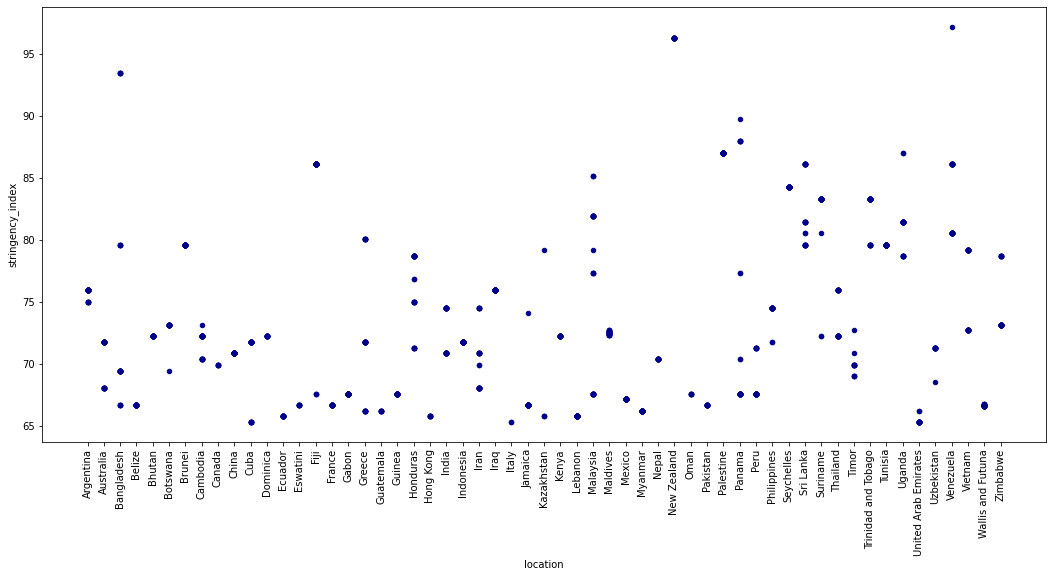

In [33]:
countofloc = 0
showSilocdf = pd.DataFrame(columns = ['location','date','stringency_index'])
listofloc = []
listofloc = dfnew2.location.unique()
for nloc in listofloc:
    if ( countofloc < 250 ):
        df9 = Stringencyidf['location'] == nloc
        dfloc = Stringencyidf.loc[df9]
        showSilocdf = showSilocdf.append(dfloc)
        countofloc = countofloc + 1
        
showSilocdf.plot.scatter(x='location', y='stringency_index', c='DarkBlue', figsize=(18,8), rot = 90);

From the above chart we can conclude that at one some point Bangladesh, New Zealand and Venezuela have stringency index more than 90. 

- Stringency index is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest). If policies vary at the subnational level, the index shows the response level of the strictest subregion.

### Q3. Creating a dataframe ( top_loctation_by_new_cases_per_million ) with 10 locations that have highest number of cases per million.

               iso_code  new_cases_per_million
location                                      
Andorra             AND             471468.834
Faeroe Islands      FRO             437424.801
Gibraltar           GIB             397554.309
San Marino          SMR             391884.730
Seychelles          SYC             381872.398
Slovenia            SVN             366975.313
Montenegro          MNE             353318.443
Israel              ISR             333205.473
Denmark             DNK             324628.070
Georgia             GEO             314115.409


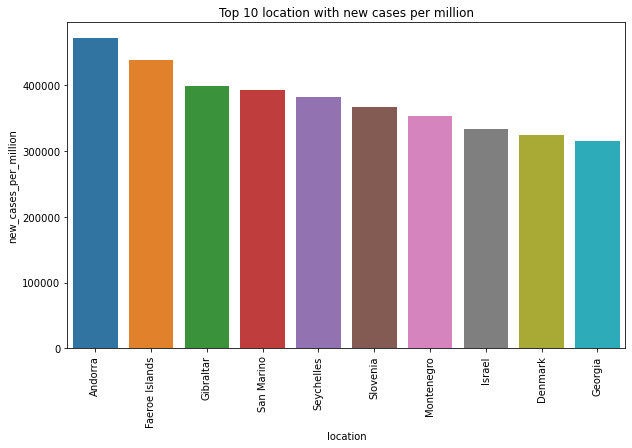

In [34]:
top_loctation_by_new_cases_per_million = dfnew2.groupby(by=['location','iso_code'])[['new_cases_per_million']].sum().sort_values('new_cases_per_million', ascending = False).head(10)
top_loctation_by_new_cases_per_million.reset_index(inplace = True )
top_loctation_by_new_cases_per_million.set_index('location', inplace = True)
print(top_loctation_by_new_cases_per_million)

plt.figure(figsize=(10,6))
plt.title('Top 10 location with new cases per million')
plt.xticks(rotation = 90)
sns.barplot(x = top_loctation_by_new_cases_per_million.index, y = top_loctation_by_new_cases_per_million.new_cases_per_million);

### Q4 Showing locations with their population by merging a dataframe which contains data related to the world. Using Geopandas 

In [55]:
!pip install geopandas --q
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Now just to verify that df_world population data is not outdated we will plot a map based on population

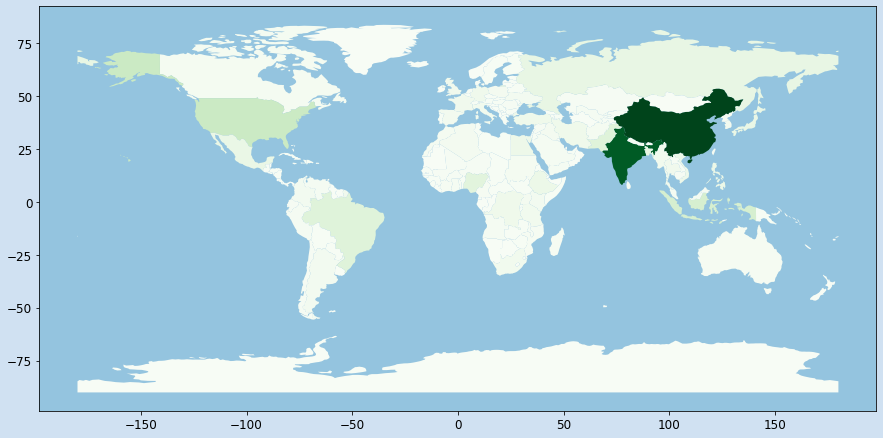

In [56]:
fig, ax = plt.subplots(figsize = (15,8), facecolor = plt.cm.Blues(.2))
ax.set_facecolor(plt.cm.Blues(.4))
df_world.plot(column = 'pop_est',cmap = 'Greens', ax = ax)
plt.show()

In [64]:
Maindf = Rawdf[['location']].merge(df_world[['pop_est','name']], left_on =['location'], right_on=['name'], how = 'inner')
Maindf.drop( ['name'], axis = 1, inplace = True)
Maindf.drop_duplicates(subset=['location'], keep='last', inplace = True)
Maindf.reset_index(inplace = True)
Maindf.drop( ['index'], axis = 1, inplace = True)
Maindf

,location,pop_est
0,Afghanistan,34124811
1,Albania,3047987
2,Algeria,40969443
3,Angola,29310273
4,Argentina,44293293
...,...,...
152,Venezuela,31304016
153,Vietnam,96160163
154,Yemen,28036829
155,Zambia,15972000


Now, we have used df_world dataframe ( from which we have retrieved population) and Rawdf dataframe ( from which we have retrieved location name ) and by applying merging we get our Maindf dataframe which contains location with their population respectively.

### Q5. Creating four dataframe having top countries with total cases, new cases, total deaths, new deaths and Also ploting their graph.

In [37]:
top_countries_with_total_cases = dfnew2.groupby(by = ['location'])[['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']].sum().sort_values('total_cases_per_million',ascending=False).head(20)
top_countries_with_new_cases = dfnew2.groupby(by = ['location'])[['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']].sum().sort_values(['new_cases_per_million'],ascending=False).head(20)
top_countries_with_total_deaths = dfnew2.groupby(by = ['location'])[['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']].sum().sort_values(['total_deaths_per_million'],ascending=False).head(20)
top_countries_with_new_deaths= dfnew2.groupby(by = ['location'])[['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']].sum().sort_values(['new_deaths_per_million'],ascending=False).head(20)

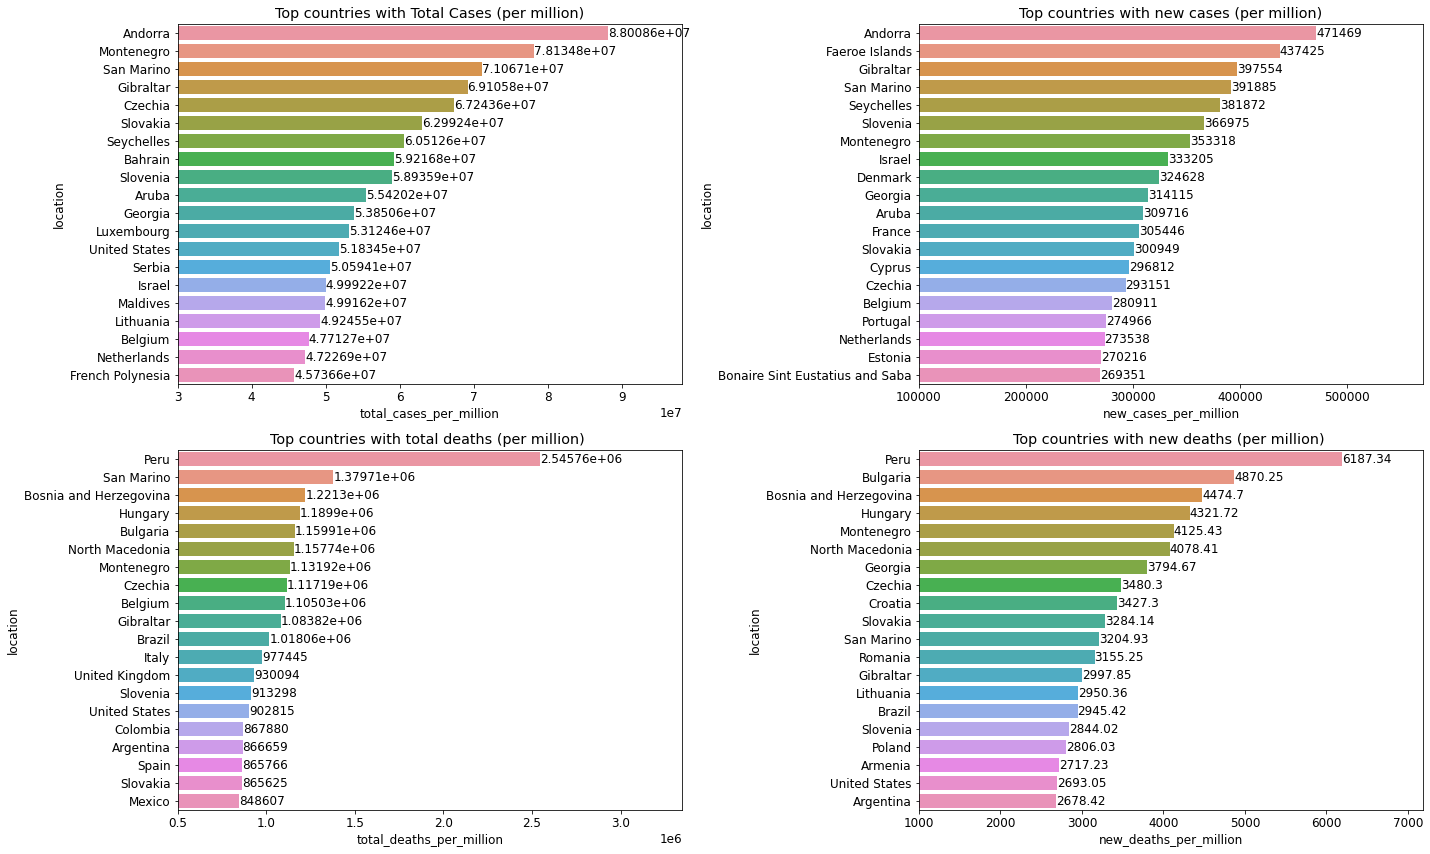

In [38]:
fig, axes = plt.subplots(2,2,figsize=(20, 12))
matplotlib.rcParams['font.size'] = 12

axes[0,0].set_title('Top countries with Total Cases (per million)')
axes[0,0].set_xlabel("Countries")
a = top_countries_with_total_cases.iloc[0].total_cases_per_million
axes[0,0].set(xlim=(30000000, ( a + 10000000 )))
sns.barplot(y=top_countries_with_total_cases.index, 
            x=top_countries_with_total_cases.total_cases_per_million, 
            ax = axes[0,0])
for i in axes[0,0].containers:
    axes[0,0].bar_label(i)
    
axes[0,1].set_title('Top countries with new cases (per million)')
axes[0,1].set_xlabel("Countries")
a = top_countries_with_new_cases.iloc[0].new_cases_per_million
axes[0,1].set(xlim=(100000, (a + 100000)))
sns.barplot(y=top_countries_with_new_cases.index, 
            x=top_countries_with_new_cases.new_cases_per_million, 
            ax = axes[0,1])
for i in axes[0,1].containers:
    axes[0,1].bar_label(i)
    
    
axes[1,0].set_title('Top countries with total deaths (per million) ')
axes[1,0].set_xlabel("Countries")
a = top_countries_with_total_deaths.iloc[0].total_deaths_per_million
axes[1,0].set(xlim=(500000, (a + 800000)))
sns.barplot(y=top_countries_with_total_deaths.index,
            x=top_countries_with_total_deaths.total_deaths_per_million , 
            ax = axes[1,0])
for i in axes[1,0].containers:
    axes[1,0].bar_label(i)

    
axes[1,1].set_title('Top countries with new deaths (per million) ')
axes[1,1].set_xlabel("Countries")
a = top_countries_with_new_deaths.iloc[0].new_deaths_per_million
axes[1,1].set(xlim=(1000, (a + 1000)))
sns.barplot(y=top_countries_with_new_deaths.index, 
            x=top_countries_with_new_deaths.new_deaths_per_million, 
            ax =axes[1,1])
for i in axes[1,1].containers:
    axes[1,1].bar_label(i)
    
plt.tight_layout(pad=1);

In the above subplot I have show top 20 location having highest no of new cases, new deaths, total cases and total deaths per million by grouping the locations with the columns and then aggregating the sum to it and showing it with sns barplot.

### Q6: Creating a list of location who are present in all ( top_countries_with_total_cases, top_countries_with_new_cases, top_countries_with_total_deaths, top_countries_with_new_deaths)

In [42]:
top_coun = top_countries_with_total_cases.index.intersection(
           top_countries_with_new_cases.index.intersection(
           top_countries_with_total_deaths.index.intersection(
           top_countries_with_new_deaths.index)))

k = 0
for i in top_coun:
    print(i)
    k = k + 1
    
print('\nHence, there are total {} locations which passes our all four criteria.'.format(k))

Montenegro
San Marino
Gibraltar
Czechia
Slovakia
Slovenia

Hence, there are total 6 locations which passes our all four criteria.


### Q7. Creating a dataframe of countries with most deaths reported on 02-02-2022.

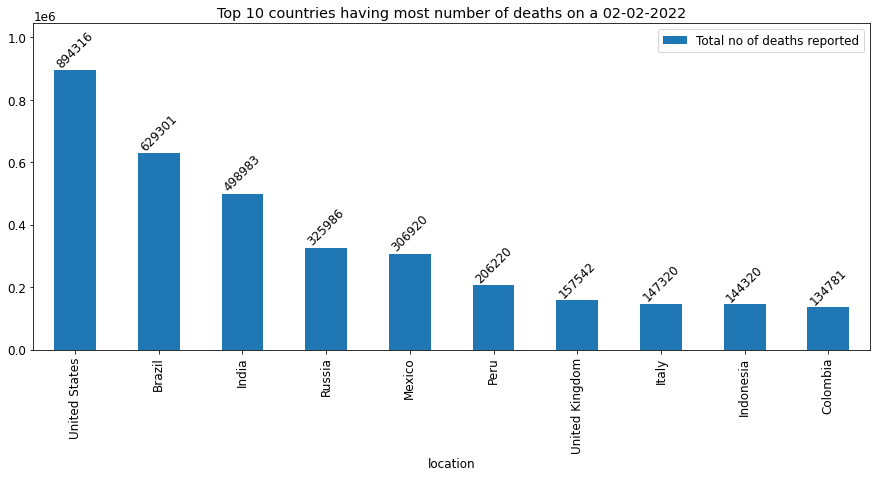

In [43]:
on_date = "2022-02-02"
casesondate = dfnew2["date"] == on_date
filterdf = dfnew2.loc[casesondate].sort_values('total_deaths', ascending = False)

showdf = filterdf.copy()
df = showdf.sort_values('total_deaths', ascending=False).head(10)

fig, ax = plt.subplots()
ax.set_title('Top 10 countries having most number of deaths on a 02-02-2022')
df.plot(kind = 'bar', figsize=(15,6), y = 'total_deaths', x = 'location' , ax =ax, label = 'Total no of deaths reported');
a = df.iloc[0].total_deaths
ax.set(ylim=(0,( a + 150000)))
for i in ax.containers:
    ax.bar_label(i,rotation=45)

The above chart top locations with most no of deaths reported on 02-02-2022 irrespective of their population density.

### Q8 . Creating a dataframe (pvamdf) for storing the number of total people vaccinated in the month of March, April, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec for all locations and showing it in heatmap for only 10 contries.

In [62]:
pvamdf = pd.DataFrame(columns = ['location'])
dfpr = dfnew2.copy()

In [63]:
stmon = 3
endmon = 12


for i in range(stmon,13):
    res = calendar.month_name[i]
    pvamdf[res] = 0

k = 0
l = stmon
for i in listofloc:
    locac = dfpr['location'] == i
    pvamdf.loc[k,'location'] = i
    dfprsun = dfpr.loc[locac]
    sumofcasesbyyear = dfprsun['date'].dt.year == 2021
    filterdf = dfprsun.loc[sumofcasesbyyear]
    l = stmon
    for j in range(len(pvamdf.columns)):
        sumofcasesbymon = filterdf['date'].dt.month == l
        if ( l <= endmon):
            res = calendar.month_name[l]
            filterdf2 = filterdf.loc[sumofcasesbymon]
            cs = filterdf2['new_cases_per_million'].sum()
            pvamdf.loc[k,res] = cs
            l = l + 1
    k = k + 1
    
    
pvamdf.set_index('location', inplace = True)
pvamdf.head(10)

,March,April,May,June,July,August,September,October,November,December
location,,,,,,,,,,
Afghanistan,18.576,82.613,303.573,1175.361,715.318,152.274,49.054,27.009,26.083,19.959
Albania,6261.890,2063.399,428.135,71.703,194.923,4631.502,8264.719,5279.971,5097.577,3577.877
Algeria,91.893,110.182,152.523,240.111,711.977,553.336,163.146,69.322,91.421,177.086
Andorra,14789.150,15797.503,6399.150,2378.675,9915.453,4589.289,2443.315,3800.708,20671.201,85645.213
Angola,44.320,127.927,232.776,126.658,115.754,140.478,266.373,231.335,21.661,484.034
Anguilla,462.810,4495.867,1057.851,0.000,264.463,6876.033,12694.214,35371.901,29223.141,19041.323
Antigua and Barbuda,4112.309,972.370,283.609,30.387,405.156,4173.083,15355.320,8376.549,840.694,1438.297
Argentina,5294.412,13782.057,17638.558,15098.729,10073.057,5610.162,1563.004,699.582,919.641,7096.903
Armenia,6934.000,7892.179,2225.645,817.014,1689.618,4051.376,6590.687,15709.904,10172.066,2160.282


Now, pvamdf is the dataframe having the sum of new cases reported on every month from March to December 2021. 

### Now, showing it in a  heatmap for 10 locations.

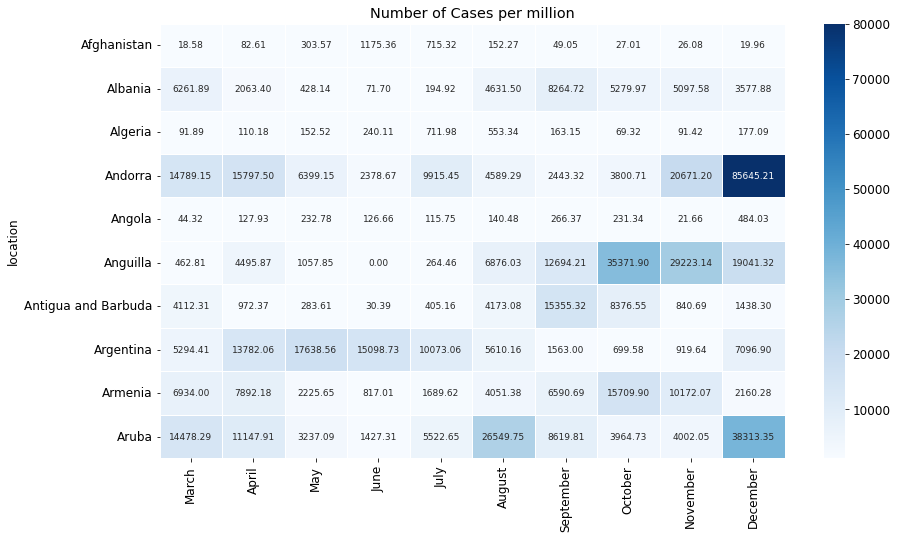

In [65]:
df = pvamdf.head(10).copy()
fig, ax = plt.subplots(figsize=(14,8))
plt.xticks( rotation = 90)
plt.title('Number of Cases per million')
sns.heatmap(df, annot=True, linewidths=1, ax=ax, cmap ='Blues' ,vmax=80000,vmin=1000,fmt='.2f',annot_kws={'size': 9});

Using the above heat map we can say that Andorra is having Most no of cases through out the year also we have shown just the sample data for some locations.

### Q9. Creating a dataframe ( showdf) having sum of all the new cases and new deaths reported on Sundays only with respect to location and also showing chart for top 10 countries.

In [66]:
dfprsun = dfnew2.copy()
dfprsun['weekday'] = pd.DatetimeIndex(dfprsun.date).weekday
sumofcasesonsunday = dfprsun['date'].dt.month == 6
sumofcasesonsunday

filterdf = dfprsun.loc[sumofcasesonsunday]
showdf = filterdf.groupby('location')[['new_cases','new_deaths']].sum()

showdf.reset_index(inplace = True)
showdf

,location,new_cases,new_deaths
0,Afghanistan,63086.0,2412.0
1,Albania,1604.0,34.0
2,Algeria,15226.0,503.0
3,Andorra,275.0,1.0
4,Angola,4496.0,143.0
...,...,...,...
219,Vietnam,9647.0,34.0
220,Wallis and Futuna,0.0,0.0
221,Yemen,1013.0,272.0
222,Zambia,60222.0,935.0


Now, showdf contains locations which are having new cases and new deaths reported on sundays only from 2020 to 2022 ( still continued )

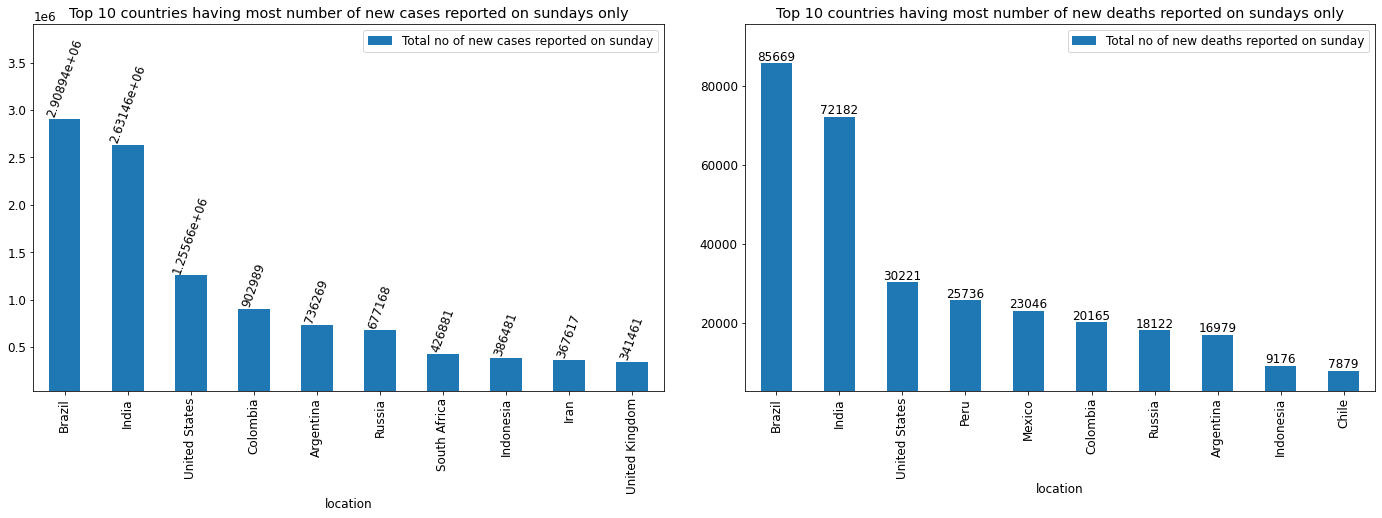

In [67]:
sumnewcases = showdf.sort_values('new_cases', ascending=False).head(10)
sumnewdeath = showdf.sort_values('new_deaths', ascending=False).head(10)

fig, axes = plt.subplots(1,2,figsize=(20, 8))
axes[0].set_title('Top 10 countries having most number of new cases reported on sundays only')
sumnewcases.plot(kind = 'bar',y = 'new_cases', x = 'location' , ax = axes[0] , label = 'Total no of new cases reported on sunday');
a = sumnewcases.iloc[0].new_cases
b = sumnewcases.iloc[-1].new_cases
axes[0].set(ylim=( (b - 300000), (a + 1000000)))
for i in axes[0].containers:
    axes[0].bar_label(i,rotation=70)
    
axes[1].set_title('Top 10 countries having most number of new deaths reported on sundays only')
sumnewdeath.plot(kind = 'bar', y = 'new_deaths', x = 'location' , ax = axes[1] , label = 'Total no of new deaths reported on sunday');
a = sumnewdeath.iloc[0].new_deaths
b = sumnewdeath.iloc[-1].new_deaths
axes[1].set(ylim=(b - 5000,( a + 10000)))
for i in axes[1].containers:
    axes[1].bar_label(i,rotation=0)

plt.tight_layout(pad=3);

For plotting the chart I have used sumnewcases and sumnewdeath dataframe which contains information regarding to our location which have reported cases on Sundays only.

### Q10 .Creating a dataframe (moving_7_10_14_avg) containing information about countries and dates where no of new cases per million starts declining in jan 2022 by using simple moving average for 7,10,14 days.

### To do this I will compare all three SMA ( 7,10,14) with each other and if SMA 14 is more then both SMA (7) and SMA (10)  we can say that the no of new cases per million have started declining.

In [71]:
moving_av_df = dfnew2.copy()
listofloc = []
listofloc = moving_av_df.location.unique()
len(listofloc)

225

In [72]:
moving_7_10_14_avg = pd.DataFrame(columns = ['location','date','sma_7','sma_10','sma_14','new_cases_per_million'])

for i in listofloc: 
    df9 = pd.DataFrame(columns = ['location','date','sma_7','sma_10','sma_14'])
    df9['sma_7'] = moving_av_df.loc[moving_av_df.location == i ]['new_cases_per_million'].rolling(7).mean()
    df9['sma_10'] = moving_av_df.loc[moving_av_df.location == i ]['new_cases_per_million'].rolling(10).mean()
    df9['sma_14'] = moving_av_df.loc[moving_av_df.location == i ]['new_cases_per_million'].rolling(14).mean()
    df9['location'] = i
    df9['date'] = moving_av_df.loc[moving_av_df.location == i ]['date']
    df9['new_cases_per_million'] = moving_av_df.loc[moving_av_df.location == i ]['new_cases_per_million']
    moving_7_10_14_avg = moving_7_10_14_avg.append(df9)

moving_7_10_14_avg.fillna(0,inplace=True)
moving_7_10_14_avg.sample(5)

,location,date,sma_7,sma_10,sma_14,new_cases_per_million
94991,Micronesia (country),2021-12-21,0.000000,0.0000,0.000000,0.000
42730,Egypt,2021-02-22,5.957857,5.9200,5.869429,5.976
132134,Somalia,2022-01-28,9.308714,6.8890,4.920714,0.000
102849,Netherlands,2021-08-06,155.467429,174.6161,198.312643,171.198
23135,Bulgaria,2021-12-07,265.718857,279.2222,288.980571,333.350


Now, from above you can clearly see that we get a dataframe which contains  SMA (new cases per million) for  7,10 and 14 days w.r.t locations.

In [73]:
showdeclinecasesdf = pd.DataFrame(columns = ['location', 'date'])

startdate = datetime.date(2022, 1, 1)
enddate = datetime.date(2022, 1, 31)

i = 0
for row in moving_7_10_14_avg.itertuples():
    if ( (row.location == listofloc[i] ) & ((row.date > startdate ) & (row.date < enddate))):
        if( (row.sma_14 > row.sma_7) & (row.sma_14 > row.sma_10) ):
            showdeclinecasesdf.loc[i,'location'] = row.location
            showdeclinecasesdf.loc[i,'date'] = pd.to_datetime(row.date).date()
            i = i + 1

print("Now showdeclinecasesdf contains data for countries which passes our criteria ")
showdeclinecasesdf

Now showdeclinecasesdf contains data for countries which passes our criteria 


,location,date
0,Afghanistan,2022-01-08
1,Albania,2022-01-22


Now, just to verify our analysis we can show this on graph

Range of date from which we have filtered out our output
Sartdate : 2022-01-01
Enddate : 2022-01-31
Country selected  Afghanistan
Date which fits our criteria  2022-01-08
Hence, for Afghanistan its on 2022-01-08 we get our first instance where no of new cases per million starts decreasing


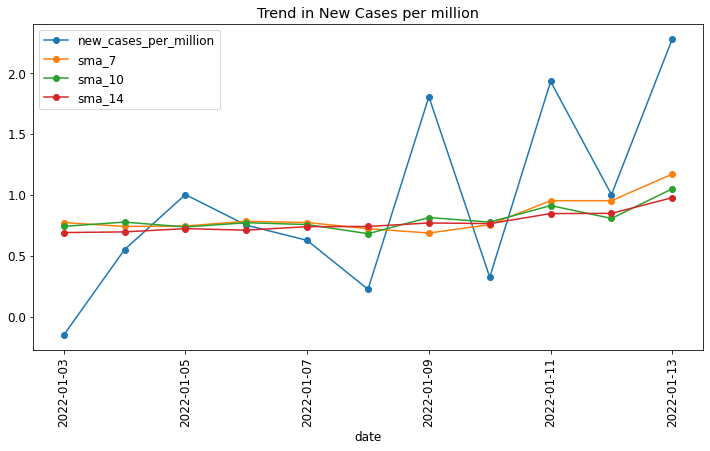

In [74]:
ts = pd.Timestamp(showdeclinecasesdf.date[0])
pre = pd.tseries.offsets.DateOffset(n = 5)
fu = pd.tseries.offsets.DateOffset(n = 5)
stdate = ts-pre
edate = ts+fu

i = 0
forgraph = pd.DataFrame(columns = ['location', 'date','new_cases_per_million','sma_7','sma_14','sma_10'])
for row in moving_7_10_14_avg.itertuples():
    if ( (row.location == showdeclinecasesdf.location[0] ) & ((row.date >= stdate ) & (row.date <= edate))):
        forgraph.loc[i,'location'] = row.location
        forgraph.loc[i,'date'] = pd.to_datetime(row.date).date()
        forgraph.loc[i,'new_cases_per_million'] = row.new_cases_per_million
        forgraph.loc[i,'sma_7'] = row.sma_7
        forgraph.loc[i,'sma_14'] = row.sma_14
        forgraph.loc[i,'sma_10'] = row.sma_10
        i = i + 1
        
forgraph.plot(kind = 'line',linestyle = '-', marker = 'o', x = 'date', y =['new_cases_per_million','sma_7','sma_10','sma_14'], figsize=(12,6), rot = 90 , title = 'Trend in New Cases per million');

print("Range of date from which we have filtered out our output")
print("Sartdate :" , startdate)
print("Enddate :" , enddate)

print("Country selected ", showdeclinecasesdf.location[0])
print("Date which fits our criteria ", showdeclinecasesdf.date[0])
print("Hence, for {} its on {} we get our first instance where no of new cases per million starts decreasing".format( showdeclinecasesdf.location[0], showdeclinecasesdf.date[0]))

From the above graph we can conclude that for Afghanistan we get 2022-01-08 as the date on which it has the passed our criteria where sma 14 is more than sma 7 and sma 10 which means that no of cases starts declining on 2022-01-08 but after that there is sudden increase in the no of cases in Afghanistan.

Range of date from which we have filtered out our output
Sartdate : 2022-01-01
Enddate : 2022-01-31
Country selected  Albania
Date which fits our criteria  2022-01-22
Hence, for Albania its on 2022-01-22 we get our first instance where no of new cases per million starts decreasing


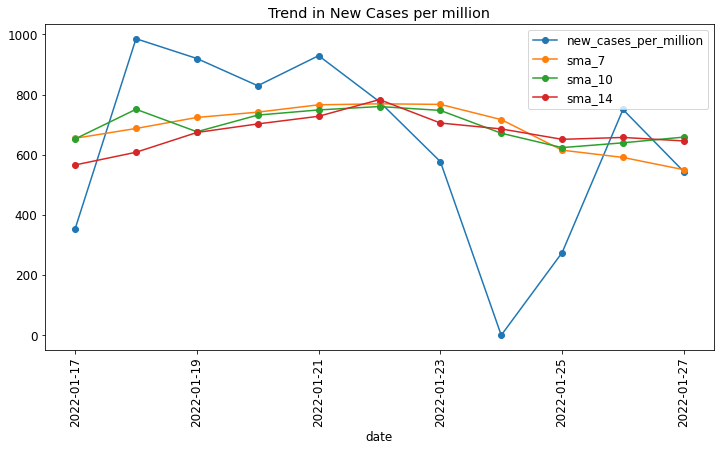

In [75]:
ts = pd.Timestamp(showdeclinecasesdf.date[1])
pre = pd.tseries.offsets.DateOffset(n = 5)
fu = pd.tseries.offsets.DateOffset(n = 5)
stdate = ts-pre
edate = ts+fu

i = 0
forgraph = pd.DataFrame(columns = ['location', 'date','new_cases_per_million','sma_7','sma_14','sma_10'])
for row in moving_7_10_14_avg.itertuples():
    if ( (row.location == showdeclinecasesdf.location[1] ) & ((row.date >= stdate ) & (row.date <= edate))):
        forgraph.loc[i,'location'] = row.location
        forgraph.loc[i,'date'] = pd.to_datetime(row.date).date()
        forgraph.loc[i,'new_cases_per_million'] = row.new_cases_per_million
        forgraph.loc[i,'sma_7'] = row.sma_7
        forgraph.loc[i,'sma_14'] = row.sma_14
        forgraph.loc[i,'sma_10'] = row.sma_10
        i = i + 1
        
forgraph.plot(kind = 'line',linestyle = '-', marker = 'o', x = 'date', y =['new_cases_per_million','sma_7','sma_10','sma_14'], figsize=(12,6), rot = 90 , title = 'Trend in New Cases per million');

print("Range of date from which we have filtered out our output")
print("Sartdate :" , startdate)
print("Enddate :" , enddate)

print("Country selected ", showdeclinecasesdf.location[1])
print("Date which fits our criteria ", showdeclinecasesdf.date[1])
print("Hence, for {} its on {} we get our first instance where no of new cases per million starts decreasing".format( showdeclinecasesdf.location[1], showdeclinecasesdf.date[1]))

Again we have found the date on which Albania showing declining in the no of cases which is on 2022-01-22.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References

https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

https://thispointer.com/pandas-6-different-ways-to-iterate-over-rows-in-a-dataframe-update-while-iterating-row-by-row/

https://subscription.packtpub.com/book/data/9781800568846/1/ch01lvl1sec05/pandas

https://datascientyst.com/filter-by-date-pandas-dataframe/

https://datatofish.com/pie-chart-matplotlib/

https://medium.com/analytics-vidhya/top-20-pandas-functions-which-are-commonly-used-for-exploratory-data-analysis-3cb817a60f46

https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

https://peltiertech.com/chart-a-wide-range-of-values/

https://www.python-graph-gallery.com/91-customize-seaborn-heatmap

https://geopandas.org/en/stable/docs/user_guide/mapping.html

https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/


## Future Works

 Showing Cases, Deaths by weekly sum.
 
 showing location in the world map where there is a recent spread of virus. 
 
 showing vaccinated people, boosters, cases, deaths w.r.t to population density
 
 showing vaccinated people with a specific location on the map
 
 showing the rate at which the no of cases are increasing day by day
 
 Creating a dataframe having the date of the locations where the location have touched their previous peak 

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "navhan9876/covideda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/navhan9876/covideda


'https://jovian.ai/navhan9876/covideda'